In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

In [90]:
# #############################################################################
# Generate sample data
rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations
X_mean = X.mean()
X = X-X_mean

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

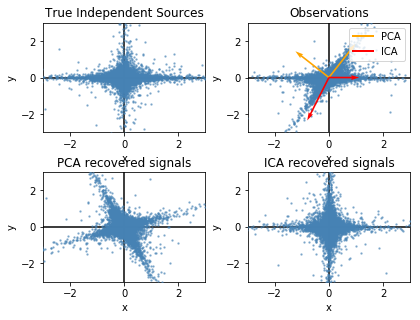

In [91]:
# #############################################################################
# Plot results

def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()

In [92]:
X.shape

(20000, 2)

In [93]:
w = np.eye(2)
print(X.mean())

1.1368683772161604e-17


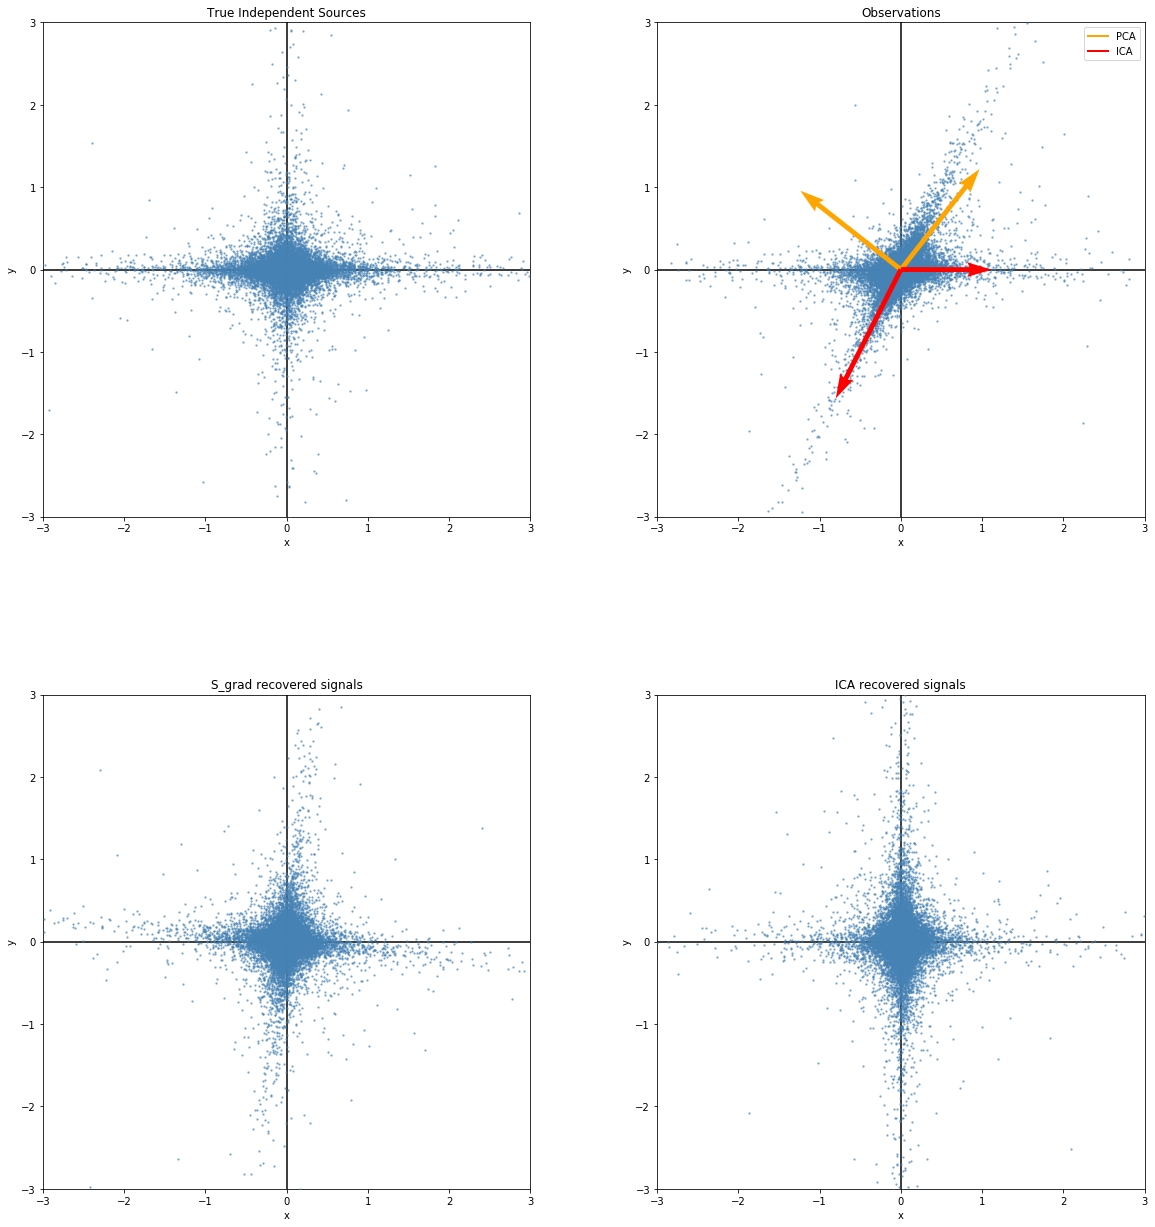

In [94]:
from numpy import dot
w = np.eye(2)
def np_sig(x):
    return  1 /(1+(np.exp(-x)))

def np_relu(x):
    mask = x>0
    return mask * x

for iter in range(3000):
    temp = np_sig(dot(X,w))
    temp = 1-2*temp
    w = w + 0.002 * (np.linalg.inv(w.T) + dot(temp.T,X))
    
plt.close('all')
plt.figure(figsize=(18, 18))

plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)
plt.title('Observations')

plt.subplot(2, 2, 3)
S_grad = dot(X,w)
plot_samples(S_grad / np.std(S_grad))
plt.title('S_grad recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()

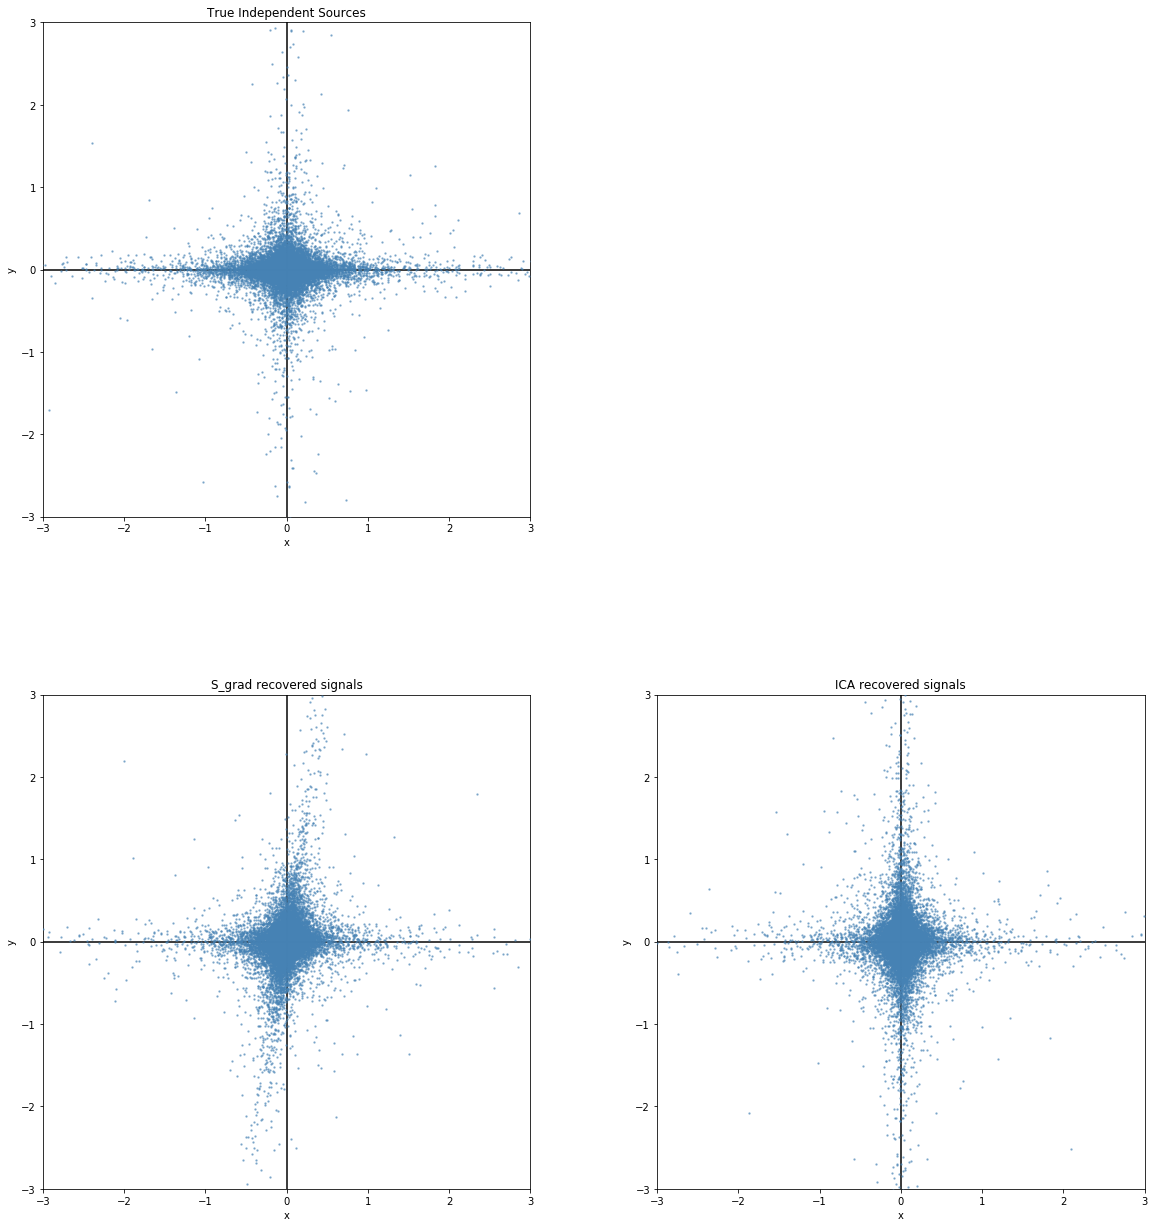

In [111]:
w = np.eye(2)
# w = np.random.randn(2,2)
v = np.zeros_like(w)
m = np.zeros_like(w)

for iter in range(1000):
    temp = np_sig(dot(X,w))
    temp = 1-2*temp
    grad = np.linalg.inv(w.T) + dot(temp.T,X)
    
    m = 0.9 * m + (1-0.9) * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.9)

    w = w + 0.3/np.sqrt(v_hat + 1e-10) * m_hat   
    
plt.close('all')
plt.figure(figsize=(18, 18))

plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

plt.subplot(2, 2, 3)
S_grad = dot(X,w)
plot_samples(S_grad / np.std(S_grad))
plt.title('S_grad recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()

In [118]:
from sklearn.metrics import matthews_corrcoef
from scipy.stats.stats import pearsonr

print(S[:,0].shape)
print(S[:,1].shape)
print(pearsonr(S[:,0],S_grad[:,1]))
print(pearsonr(S[:,1],S_grad[:,0]))

print(pearsonr(S[:,0],S_ica_[:,1]))
print(pearsonr(S[:,1],S_ica_[:,0]))

(20000,)
(20000,)
(-0.9999999996436203, 0.0)
(0.9935552369971771, 0.0)
(0.9999754818194516, 0.0)
(-0.999999286152221, 0.0)
